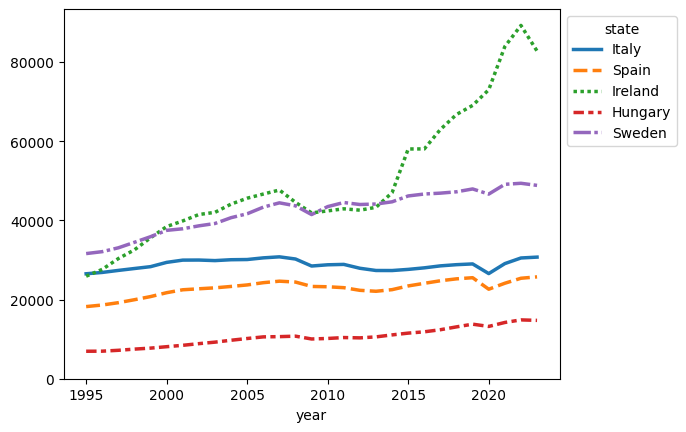

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

States = ['Italy', 'Spain', 'Ireland', 'Hungary', 'Sweden']
gdp_file = r'..\data\gdp_perCapita.csv'
df = pd.read_csv(gdp_file, sep=',', usecols=['geo', 'TIME_PERIOD', 'OBS_VALUE']).rename(columns={"geo":"state", "TIME_PERIOD": "year", "OBS_VALUE":"GDP" })
dfPivoted = df.pivot(index='year', columns='state', values='GDP')
lnPlot = sns.lineplot(data = dfPivoted[States], palette="tab10", linewidth= 2.5)
lnPlot.set_ylim(ymin=0)
sns.move_legend(obj=lnPlot, loc='upper right', bbox_to_anchor=(1.25, 1))

np.float64(2.3671792620723795)

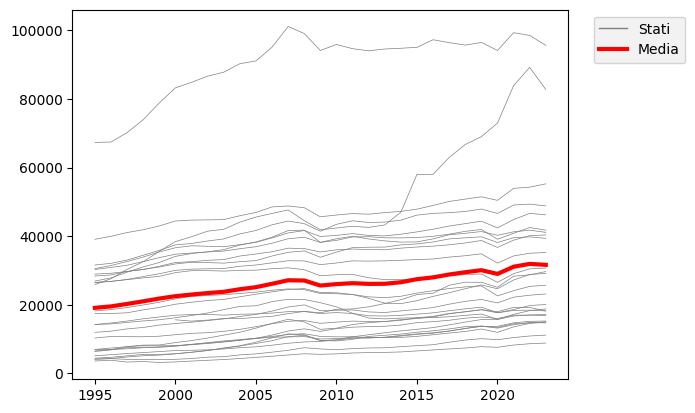

In [3]:
dfPctChange = dfPivoted.pct_change() * 100  

mean = dfPivoted.mean(axis=1)

for state in dfPivoted.columns:
    sns.lineplot(x=dfPivoted.index, y=dfPivoted[state], color="gray" , linewidth=0.5, label=None)
sns.lineplot(data=mean, color="red", linewidth=3, label="Media")
sns.set_style(rc={'axes.facecolor':'#efefef','figure.facecolor': '#efefef'})
plt.legend(handles=[
    plt.Line2D([0], [0], color='gray', lw=1, label='Stati'),
    plt.Line2D([0], [0], color='red', lw=3, label='Media')],
    loc='upper right', bbox_to_anchor=(1.25, 1))

plt.ylabel(None)
plt.xlabel(None)
dfPctChange.mean().mean()

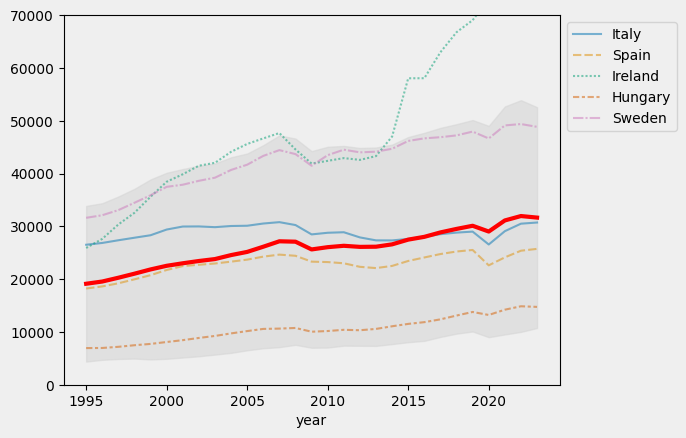

In [4]:
var = dfPivoted.var(axis=1)
dev_std = dfPivoted.std(axis=1)

sns.lineplot(data = dfPivoted[States], palette="colorblind", alpha=0.5, linewidth= 1.5)
lnPlot = sns.lineplot(data=mean, linewidth=3, color='red', hue_norm=(0, 100000))
lnPlot.set_ylim(ymin=0, ymax = 70000)
plt.fill_between(dfPivoted.index, mean - dev_std, 
                 mean + dev_std, alpha=0.5, label='Deviazione Standard', color="lightgray")
sns.move_legend(obj=lnPlot, loc='upper right', bbox_to_anchor=(1.25, 1))
sns.set_style(rc={'axes.facecolor':'#efefef','figure.facecolor': '#efefef'})
plt.show()


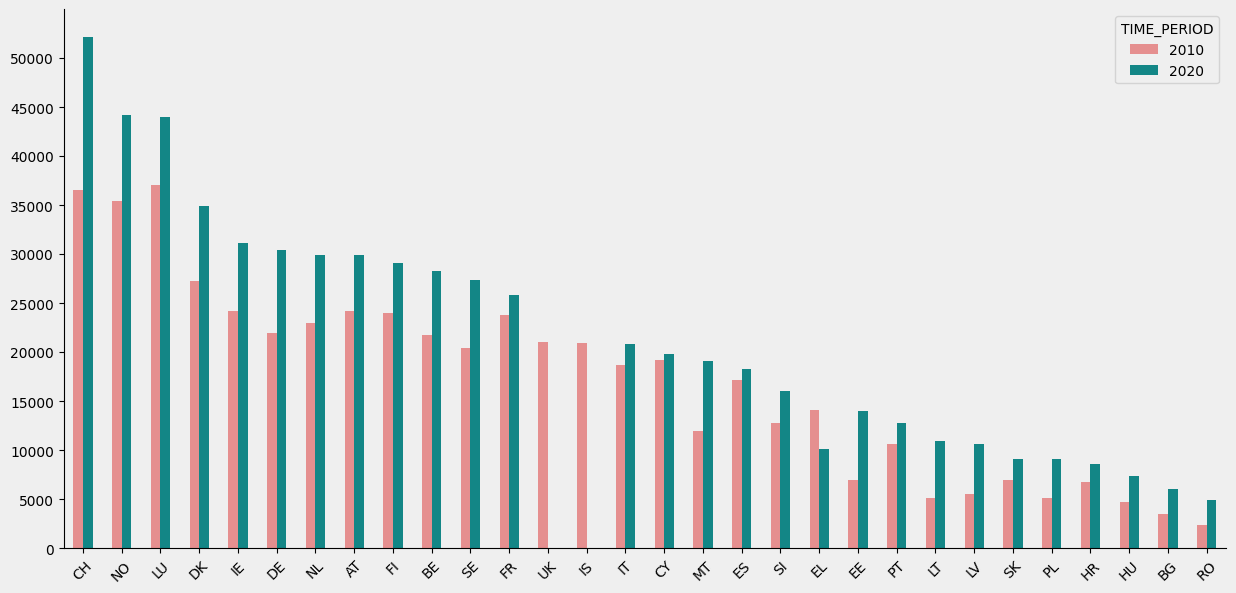

In [ ]:
# Unemployment rate in % of the active population between 15 and 74.
import matplotlib.ticker as ticker

df = pd.read_csv(r'..\data\mean_income_bySex.csv', sep=',', usecols=['geo','sex', 'TIME_PERIOD','OBS_VALUE'])

state_codes ={
    "Belgium": "BE",
    "Bulgaria": "BG",
    "Czech Republic": "CZ",
    "Denmark": "DK",
    "Germany": "DE",
    "Estonia": "EE",
    "Ireland": "IE",
    "Greece": "EL",
    "Spain": "ES",
    "France": "FR",
    "Croatia": "HR",
    "Italy": "IT",
    "Cyprus": "CY",
    "Latvia": "LV",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Hungary": "HU",
    "Malta": "MT",
    "Netherlands": "NL",
    "Austria": "AT",
    "Poland": "PL",
    "Portugal": "PT",
    "Romania": "RO",
    "Slovenia": "SI",
    "Slovakia": "SK",
    "Finland": "FI",
    "Sweden": "SE",
    "United Kingdom": "UK",
    "Iceland": "IS",
    "Liechtenstein": "LI",
    "Norway": "NO",
    "Switzerland": "CH",
    "Turkey": "TR",
    "Israel": "IL"
}
df['geo'] = df['geo'].map(state_codes)
df_sex = df[df['sex'] == 'Males'] 
f = df_sex.sort_values(ascending=False,by='OBS_VALUE')
plt.figure(figsize=(15,7))
df_sex = df_sex[df_sex['TIME_PERIOD'].isin([2010,2020])]
ax = sns.barplot(data=df_sex, x='geo', y='OBS_VALUE',hue='TIME_PERIOD', width=0.5, errorbar=None, palette={2010:'#f48080',2020:'#009999'})
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
sns.despine()
plt.xticks(rotation=45)
ax.set_ylim(0,55000)
ax.set_yticks(np.arange(0,55000,step=5000))
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.savefig(r'..\..\mean_income_M_barplot.png', transparent=True)


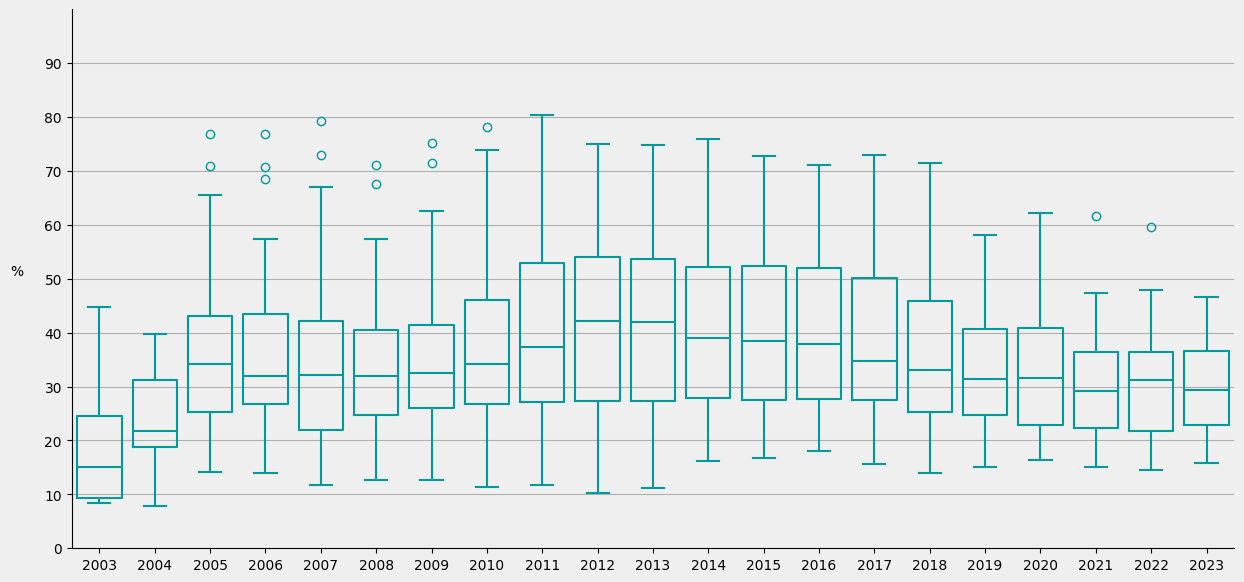

In [6]:
df = pd.read_csv(r'..\data\unexpected_expenses.csv', usecols=['geo', 'TIME_PERIOD', 'OBS_VALUE'])
closest_to_2010 = df.loc[
    df.groupby('geo')['TIME_PERIOD'].apply(lambda x: (x - 2010).abs().idxmin())
]
latest_year = df.loc[df.groupby('geo')['TIME_PERIOD'].idxmax()]
result = pd.concat([closest_to_2010, latest_year]).drop_duplicates().reset_index(drop=True)
result.loc[result['TIME_PERIOD'] != result.groupby('geo')['TIME_PERIOD'].transform('max'), 'TIME_PERIOD'] = 2010
result.loc[result['TIME_PERIOD'] == result.groupby('geo')['TIME_PERIOD'].transform('max'), 'TIME_PERIOD'] = 2023
result = result.sort_values(['geo', 'TIME_PERIOD']).reset_index(drop=True)

mean = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
mean = pd.DataFrame(mean)

plt.figure(figsize=(15,7))

ax = sns.boxplot(x=df['TIME_PERIOD'], y=df['OBS_VALUE'], fill=False, color='#009999')
sns.despine()
ax.set_xlabel(None)
ax.set_ylabel('%', rotation=0, labelpad=20)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,100,step=10))
plt.grid(axis='y')
plt.savefig(r'..\..\unexpected_expenses_boxplot.png', transparent=True)

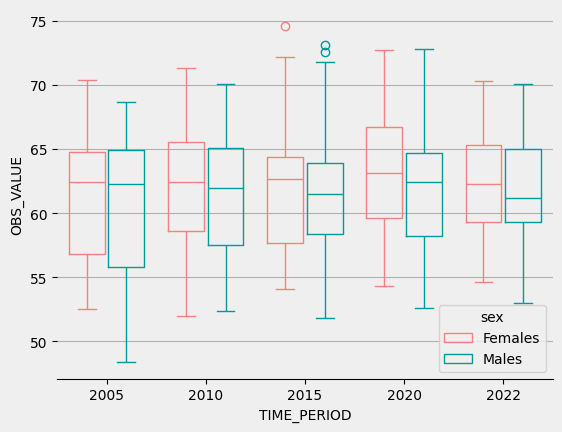

In [ ]:
df = pd.read_csv(r'..\data\healthy_life_years.csv', usecols=['geo', 'TIME_PERIOD', 'sex', 'OBS_VALUE'])
df_sex = df[df['sex'] != 'Total']
df_filtered = df_sex[df_sex['TIME_PERIOD'].isin([2005,2010,2015,2020,2022])]

sns.boxplot(
    data=df_filtered, x="TIME_PERIOD", y="OBS_VALUE",
    hue="sex", gap=.1, fill=False,
    legend=True, palette={'Females':'#f48080','Males':'#009999'},
    linewidth=1, saturation=0.6
    )

plt.grid(axis='y')
sns.despine(left=True)

plt.savefig(r'..\..\healthy_life_years.png', transparent=True)